<a href="https://colab.research.google.com/github/kashifkhan9555/Certainly-how-about-UnifiedHousingPredictor-Quantum-SVM-and-Neural-Net-Insights-/blob/main/Certainly%2C_how_about_%22UnifiedHousingPredictor_Quantum%2C_SVM%2C_and_Neural_Net_Insights%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
# Load the California Housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=['target'])

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train_scaled, y_train.values.ravel())
gb_pred = gb_regressor.predict(X_test_scaled)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting R-squared: {gb_r2}")

Gradient Boosting R-squared: 0.7756433164710084


In [6]:
# Support Vector Machines (SVM) Regressor
svm_regressor = SVR(kernel='linear', C=1)
svm_regressor.fit(X_train_scaled, y_train.values.ravel())
svm_pred = svm_regressor.predict(X_test_scaled)
svm_r2 = r2_score(y_test, svm_pred)
print(f"SVM R-squared: {svm_r2}")

SVM R-squared: 0.5579459432294915


In [7]:
# Neural Network (Deep Learning) Regressor using Keras
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

In [8]:
# Predictions
nn_pred = model.predict(X_test_scaled)
nn_r2 = r2_score(y_test, nn_pred)
print(f"Neural Network R-squared: {nn_r2}")

129/129 [==============================] - 0s 1ms/step
Neural Network R-squared: 0.7924042207020541


In [10]:
# prompt: impot matplot lib

import matplotlib.pyplot as plt


In [11]:
# Visualize predictions against true values
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Predictions')

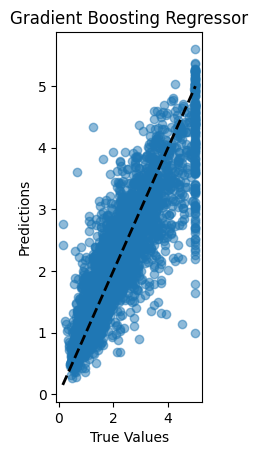

In [15]:
# Gradient Boosting
plt.subplot(1, 3, 1)
plt.scatter(y_test, gb_pred, alpha=0.5)
plt.plot([min(y_test['target']), max(y_test['target'])], [min(y_test['target']), max(y_test['target'])], 'k--', lw=2)
plt.title('Gradient Boosting Regressor')
plt.xlabel('True Values')
plt.ylabel('Predictions')

Text(0, 0.5, 'Predictions')

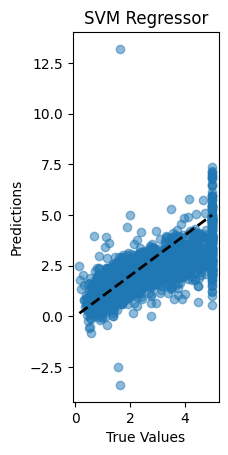

In [16]:
# SVM
plt.subplot(1, 3, 2)
plt.scatter(y_test, svm_pred, alpha=0.5)
plt.plot([min(y_test['target']), max(y_test['target'])], [min(y_test['target']), max(y_test['target'])], 'k--', lw=2)
plt.title('SVM Regressor')
plt.xlabel('True Values')
plt.ylabel('Predictions')

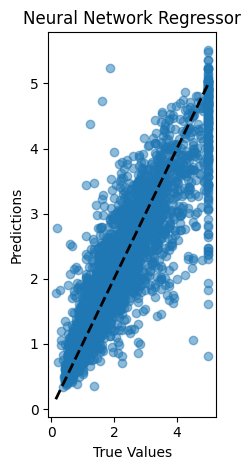

In [17]:
# Neural Network
plt.subplot(1, 3, 3)
plt.scatter(y_test, nn_pred, alpha=0.5)
plt.plot([min(y_test['target']), max(y_test['target'])], [min(y_test['target']), max(y_test['target'])], 'k--', lw=2)
plt.title('Neural Network Regressor')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()